Saving Copy of daily-website-visitors (3) (1).csv to Copy of daily-website-visitors (3) (1).csv


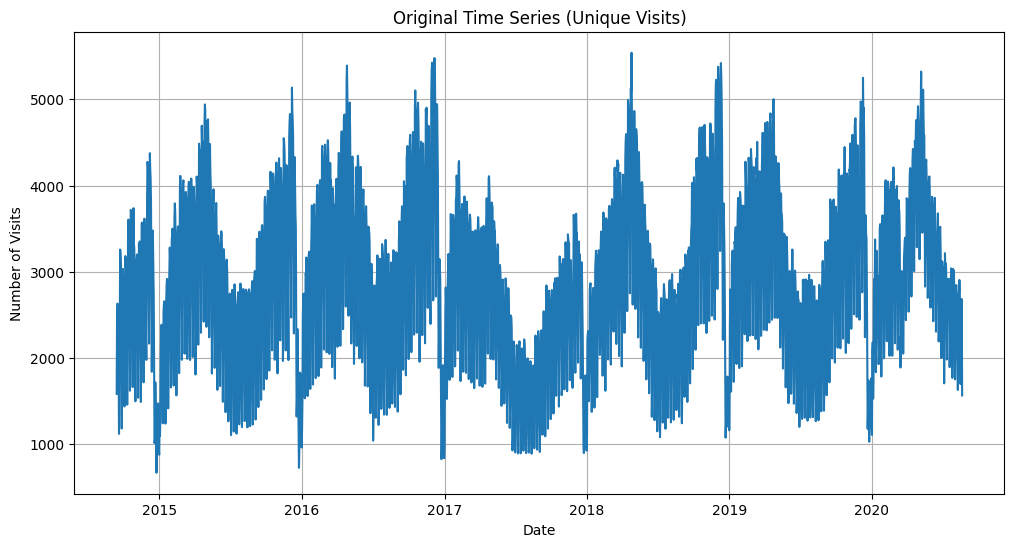

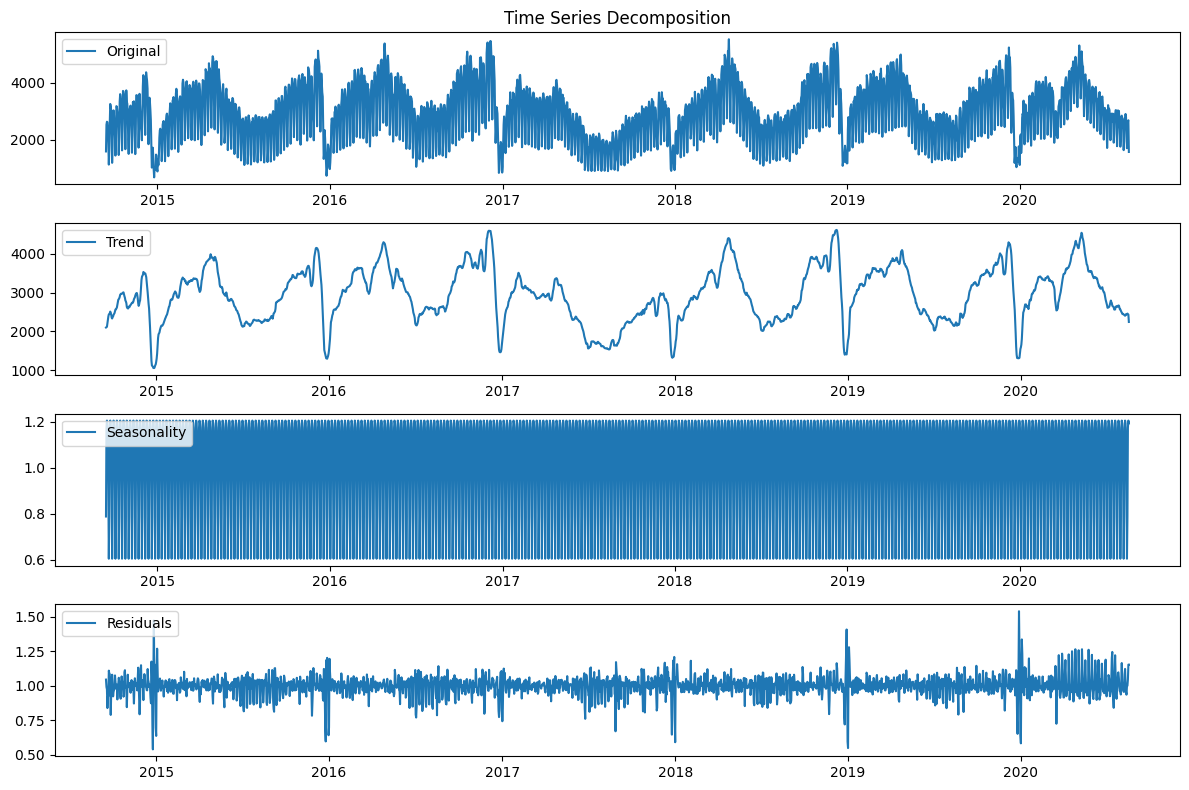

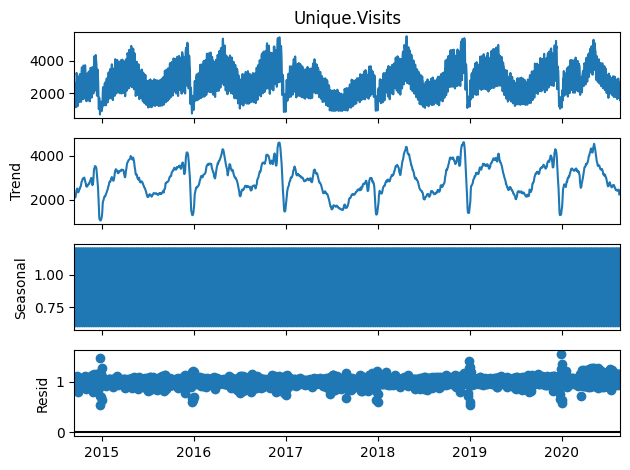


Trend Summary Statistics:
count    2161.000000
mean     2945.721095
std       696.971357
min      1057.714286
25%      2435.000000
50%      2951.285714
75%      3465.857143
max      4611.571429
Name: trend, dtype: float64

Seasonal Summary Statistics:
count    2167.000000
mean        1.000166
std         0.219536
min         0.604495
25%         0.787914
50%         1.132255
75%         1.192669
max         1.204932
Name: seasonal, dtype: float64

Residuals Summary Statistics:
count    2161.000000
mean        0.999031
std         0.076579
min         0.538122
25%         0.966198
50%         1.003011
75%         1.036575
max         1.538856
Name: resid, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from google.colab import files
uploaded = files.upload()


df = pd.read_csv('/content/drive/MyDrive/time series/EXP7/Copy of daily-website-visitors (3).csv')



df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


numeric_cols = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
for col in numeric_cols:
    df[col] = df[col].str.replace(',', '').astype(int)


ts = df['Unique.Visits']


plt.figure(figsize=(12, 6))
plt.plot(ts)
plt.title('Original Time Series (Unique Visits)')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.grid(True)
plt.show()


result = seasonal_decompose(ts, model='multiplicative', period=7)


plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(ts, label='Original')
plt.legend(loc='upper left')
plt.title('Time Series Decomposition')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


result.plot()
plt.show()


print("\nTrend Summary Statistics:")
print(result.trend.describe())

print("\nSeasonal Summary Statistics:")
print(result.seasonal.describe())

print("\nResiduals Summary Statistics:")
print(result.resid.describe())